In [17]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [22]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
pip install tensorflow_datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 311.6 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 1.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 1.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 579.4 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 kB 789.6 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 1.2 MB/s eta 0:00:0000:0100:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.9/230.9 kB 985.1 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.4/166.4 kB 558.3 kB/s eta 0:00:00a 0:00:01
  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21483 sha256=bf0d5bb3d3694b9c7226db81eb12ac0b245f2d644696496dc75d7b3fdd8e6259
  Stored in directory: /Users/justinsheng/Library/Caches/pip/wheels/90/74/b1/9b54c896b8d9409e9

In [4]:
import tensorflow_datasets as tfds

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
(train, test) = tfds.load('mnist',
                                split = ['train','test'])

In [8]:
(train, test) = tfds.load('mnist',
                                split = ['train','test'])

In [9]:
train

<_PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

In [10]:
test

<_PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

def load_dataset(train_size, test_size):
    train, test = tf.keras.datasets.mnist.load_data()

    # take a sample
    train_idx = np.random.randint(low=0, high=train[0].shape[0], size=train_size)
    test_idx = np.random.randint(low=0, high=test[0].shape[0], size=test_size)
    X_train = train[0][train_idx].reshape(-1,28*28)
    y_train = train[1][train_idx].reshape(-1,1)
    X_test = test[0][test_idx].reshape(-1,28*28)
    y_test = test[1][test_idx].reshape(-1,1)

    scale = StandardScaler()
    X_train = scale.fit_transform(X_train)
    X_test = scale.transform(X_test)

    OH = OneHotEncoder(categories='auto',sparse=False)
    y_train = OH.fit_transform(y_train)
    y_test = OH.transform(y_test)

    print('X_train:',X_train.shape)
    print('y_train:',y_train.shape)
    print('X_test:',X_test.shape)
    print('y_test:',y_test.shape)
    print('Min:', X_train.min())
    print('Max:', X_train.max())

    return X_train, X_test, y_train, y_test

In [26]:
X_train, X_test, y_train, y_test = load_dataset(60000,10000)

X_train: (60000, 784)
y_train: (60000, 10)
X_test: (10000, 784)
y_test: (10000, 10)
Min: -1.2681658311850954
Max: 244.94693302855296


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Optimizing at the Initialization Stage

In [29]:
init = tf. initializers.zeros()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [31]:
from tensorflow.keras import layers

In [32]:
def simple_model(initializer, activation='relu'):
    return tf.keras.Sequential([layers.Dense(32, activation, input_shape=(784,), kernel_initializer=initializer),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.Dense(10, activation = 'softmax', kernel_initializer=tf.keras.initializers.glorot_normal())
    ])

In [33]:
model_zeros = simple_model(init, activate)

In [34]:
model_zeros.compile(optimizer=optimizer, loss = 'categorical_crossentropy',metrics = ['accuracy'])
model_zeros.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

Epoch 1/10
19/19 [==============================] - 1s 14ms/step - loss: 2.3026 - accuracy: 0.1117 - val_loss: 2.3025 - val_accuracy: 0.1108
Epoch 2/10
19/19 [==============================] - 0s 7ms/step - loss: 2.3025 - accuracy: 0.1121 - val_loss: 2.3025 - val_accuracy: 0.1108
Epoch 3/10
19/19 [==============================] - 0s 7ms/step - loss: 2.3025 - accuracy: 0.1121 - val_loss: 2.3025 - val_accuracy: 0.1108
Epoch 4/10
19/19 [==============================] - 0s 7ms/step - loss: 2.3024 - accuracy: 0.1121 - val_loss: 2.3024 - val_accuracy: 0.1108
Epoch 5/10
19/19 [==============================] - 0s 7ms/step - loss: 2.3023 - accuracy: 0.1121 - val_loss: 2.3024 - val_accuracy: 0.1108
Epoch 6/10
19/19 [==============================] - 0s 8ms/step - loss: 2.3023 - accuracy: 0.1121 - val_loss: 2.3023 - val_accuracy: 0.1108
Epoch 7/10
19/19 [==============================] - 0s 8ms/step - loss: 2.3023 - accuracy: 0.1121 - val_loss: 2.3023 - val_accuracy: 0.1108
Epoch 8/10
19/19 [=

In [36]:
init = tf.initializers.random_normal()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model_normal = simple_model(init, activate)
model_normal.compile(optimizer=optimizer, loss = 'categorical_crossentropy',metrics = ['accuracy'])
model_normal.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
19/19 [==============================] - 0s 12ms/step - loss: 2.3020 - accuracy: 0.1421 - val_loss: 2.3020 - val_accuracy: 0.1442
Epoch 2/10
19/19 [==============================] - 0s 7ms/step - loss: 2.3017 - accuracy: 0.1409 - val_loss: 2.3018 - val_accuracy: 0.1411
Epoch 3/10
19/19 [==============================] - 0s 6ms/step - loss: 2.3014 - accuracy: 0.1360 - val_loss: 2.3015 - val_accuracy: 0.1336
Epoch 4/10
19/19 [==============================] - 0s 7ms/step - loss: 2.3012 - accuracy: 0.1314 - val_loss: 2.3013 - val_accuracy: 0.1275
Epoch 5/10
19/19 [==============================] - 0s 7ms/step - loss: 2.3009 - accuracy: 0.1256 - val_loss: 2.3011 - val_accuracy: 0.1221
Epoch 6/10
19/19 [==============================] - 0s 7ms/step - loss: 2.3007 - accuracy: 0.1209 - val_loss: 2.3009 - val_accuracy: 0.1178
Epoch 7/10
19/19 [==============================] - 0s 8ms/step - loss: 2.3005 - accuracy: 0.1225 - val_loss: 2.3007 - val_accuracy: 0.1244
Epoch 8/10
19/19 [=

In [37]:
init = tf.initializers.glorot_uniform()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model_glorotu = simple_model(init, activate)
model_glorotu.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_glorotu.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
19/19 [==============================] - 0s 12ms/step - loss: 2.3246 - accuracy: 0.1064 - val_loss: 2.2954 - val_accuracy: 0.1119
Epoch 2/10
19/19 [==============================] - 0s 8ms/step - loss: 2.2618 - accuracy: 0.1326 - val_loss: 2.2419 - val_accuracy: 0.1669
Epoch 3/10
19/19 [==============================] - 0s 7ms/step - loss: 2.2118 - accuracy: 0.2038 - val_loss: 2.1932 - val_accuracy: 0.2429
Epoch 4/10
19/19 [==============================] - 0s 7ms/step - loss: 2.1623 - accuracy: 0.2666 - val_loss: 2.1425 - val_accuracy: 0.2904
Epoch 5/10
19/19 [==============================] - 0s 7ms/step - loss: 2.1091 - accuracy: 0.3080 - val_loss: 2.0871 - val_accuracy: 0.3221
Epoch 6/10
19/19 [==============================] - 0s 7ms/step - loss: 2.0502 - accuracy: 0.3334 - val_loss: 2.0264 - val_accuracy: 0.3405
Epoch 7/10
19/19 [==============================] - 0s 7ms/step - loss: 1.9861 - accuracy: 0.3511 - val_loss: 1.9618 - val_accuracy: 0.3529
Epoch 8/10
19/19 [=

In [38]:
init = tf.initializers.he_uniform()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model_heu = simple_model(init, activate)
model_heu.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_heu.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
19/19 [==============================] - 1s 14ms/step - loss: 2.9617 - accuracy: 0.1499 - val_loss: 2.3792 - val_accuracy: 0.2266
Epoch 2/10
19/19 [==============================] - 0s 8ms/step - loss: 2.1882 - accuracy: 0.2796 - val_loss: 2.0618 - val_accuracy: 0.3287
Epoch 3/10
19/19 [==============================] - 0s 8ms/step - loss: 1.9276 - accuracy: 0.3703 - val_loss: 1.8381 - val_accuracy: 0.3975
Epoch 4/10
19/19 [==============================] - 0s 8ms/step - loss: 1.7230 - accuracy: 0.4398 - val_loss: 1.6471 - val_accuracy: 0.4744
Epoch 5/10
19/19 [==============================] - 0s 8ms/step - loss: 1.5422 - accuracy: 0.5133 - val_loss: 1.4741 - val_accuracy: 0.5406
Epoch 6/10
19/19 [==============================] - 0s 8ms/step - loss: 1.3789 - accuracy: 0.5735 - val_loss: 1.3233 - val_accuracy: 0.5906
Epoch 7/10
19/19 [==============================] - 0s 7ms/step - loss: 1.2408 - accuracy: 0.6192 - val_loss: 1.1988 - val_accuracy: 0.6381
Epoch 8/10
19/19 [=

Text(0, 0.5, 'Validation Accuracy')

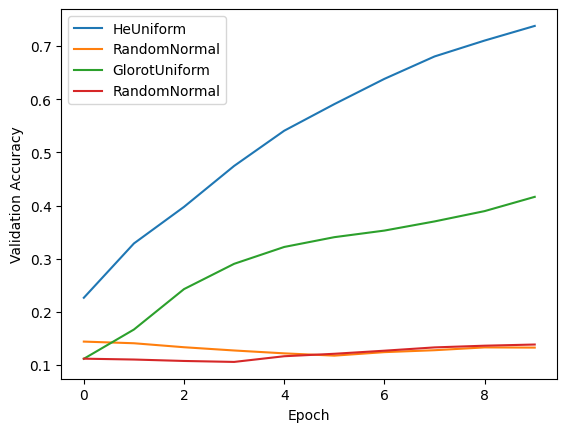

In [39]:
for i in [model_heu, model_normal, model_glorotu,model_zeros]:
    plt.plot(i.history.history['val_accuracy'], label= i.get_config()['layers'][1]['config']['kernel_initializer']['class_name'])

plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')

In [40]:
def simple_model_bn(initializer = 'he_uniform', activation='relu'):
    return tf.keras.Sequential([layers.Dense(32, activation, input_shape=(784,), kernel_initializer=initializer),
                                layers.BatchNormalization(trainable=True, scale=True, center=True),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.BatchNormalization(trainable=True, scale=True, center=True),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.BatchNormalization(trainable=True, scale=True, center=True),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.BatchNormalization(trainable=True, scale=True, center=True),
                                layers.Dense(10, activation = 'softmax', kernel_initializer=tf.keras.initializers.glorot_normal())
    ])

In [42]:
simple_model_bn().summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 32)                25120     
                                                                 
 batch_normalization (Batch  (None, 32)                128       
 Normalization)                                                  
                                                                 
 dense_26 (Dense)            (None, 32)                1056      
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 dense_27 (Dense)            (None, 32)                1056      
                                                                 
 batch_normalization_2 (Bat  (None, 32)               

In [43]:
init = tf.keras.initializers.random_normal()
activate = 'relu'

optimizer = tf.keras.optimizers.SGD(0.01)
model_bn = simple_model_bn(init, activate)
model_bn.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_bn.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data = (X_test, y_test))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
19/19 [==============================] - 1s 19ms/step - loss: 2.0045 - accuracy: 0.3431 - val_loss: 2.2949 - val_accuracy: 0.2019
Epoch 2/10
19/19 [==============================] - 0s 12ms/step - loss: 1.3486 - accuracy: 0.5904 - val_loss: 2.2850 - val_accuracy: 0.2703
Epoch 3/10
19/19 [==============================] - 0s 14ms/step - loss: 1.0496 - accuracy: 0.6951 - val_loss: 2.2720 - val_accuracy: 0.3138
Epoch 4/10
19/19 [==============================] - 0s 11ms/step - loss: 0.8724 - accuracy: 0.7499 - val_loss: 2.2542 - val_accuracy: 0.3702
Epoch 5/10
19/19 [==============================] - 0s 11ms/step - loss: 0.7587 - accuracy: 0.7829 - val_loss: 2.2296 - val_accuracy: 0.4253
Epoch 6/10
19/19 [==============================] - 0s 12ms/step - loss: 0.6779 - accuracy: 0.8056 - val_loss: 2.1967 - val_accuracy: 0.4709
Epoch 7/10
19/19 [==============================] - 0s 11ms/step - loss: 0.6181 - accuracy: 0.8239 - val_loss: 2.1530 - val_accuracy: 0.5156
Epoch 8/10
19

In [44]:
init = tf.keras.initializers.random_uniform()
activate = 'relu'

optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.01)
model_bn_ad = simple_model_bn(init, activate)
model_bn_ad.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_bn_ad.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data = (X_test, y_test))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
19/19 [==============================] - 1s 20ms/step - loss: 1.1090 - accuracy: 0.6592 - val_loss: 2.2958 - val_accuracy: 0.3052
Epoch 2/10
19/19 [==============================] - 0s 12ms/step - loss: 0.4757 - accuracy: 0.8696 - val_loss: 2.2903 - val_accuracy: 0.2226
Epoch 3/10
19/19 [==============================] - 0s 12ms/step - loss: 0.3561 - accuracy: 0.9051 - val_loss: 2.2833 - val_accuracy: 0.1556
Epoch 4/10
19/19 [==============================] - 0s 12ms/step - loss: 0.2970 - accuracy: 0.9210 - val_loss: 2.2740 - val_accuracy: 0.1234
Epoch 5/10
19/19 [==============================] - 0s 12ms/step - loss: 0.2588 - accuracy: 0.9316 - val_loss: 2.2616 - val_accuracy: 0.1305
Epoch 6/10
19/19 [==============================] - 0s 12ms/step - loss: 0.2327 - accuracy: 0.9389 - val_loss: 2.2449 - val_accuracy: 0.1507
Epoch 7/10
19/19 [==============================] - 0s 12ms/step - loss: 0.2119 - accuracy: 0.9457 - val_loss: 2.2235 - val_accuracy: 0.1914
Epoch 8/10
19

In [45]:
init = tf.keras.initializers.random_uniform()
activate = 'relu'

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model_bn_adam = simple_model_bn(init, activate)
model_bn_adam.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_bn_adam.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data = (X_test, y_test))

Epoch 1/10
19/19 [==============================] - 1s 18ms/step - loss: 0.8105 - accuracy: 0.7517 - val_loss: 2.1150 - val_accuracy: 0.2346
Epoch 2/10
19/19 [==============================] - 0s 11ms/step - loss: 0.2532 - accuracy: 0.9265 - val_loss: 1.9048 - val_accuracy: 0.3591
Epoch 3/10
19/19 [==============================] - 0s 11ms/step - loss: 0.1724 - accuracy: 0.9497 - val_loss: 1.7523 - val_accuracy: 0.5029
Epoch 4/10
19/19 [==============================] - 0s 11ms/step - loss: 0.1301 - accuracy: 0.9614 - val_loss: 1.5793 - val_accuracy: 0.6215
Epoch 5/10
19/19 [==============================] - 0s 10ms/step - loss: 0.1035 - accuracy: 0.9701 - val_loss: 1.3980 - val_accuracy: 0.7200
Epoch 6/10
19/19 [==============================] - 0s 11ms/step - loss: 0.0867 - accuracy: 0.9746 - val_loss: 1.1600 - val_accuracy: 0.8141
Epoch 7/10
19/19 [==============================] - 0s 12ms/step - loss: 0.0689 - accuracy: 0.9801 - val_loss: 0.9513 - val_accuracy: 0.8659
Epoch 8/10
19

In [46]:
from tensorflow.keras.callbacks import EarlyStopping

In [48]:
init = tf.keras.initializers.random_uniform()
activate = 'relu'

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model_bn_adam = simple_model_bn(init, activate)
model_bn_adam.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True, verbose=1)

history = model_bn_adam.fit(X_train, y_train, epochs=2000, callbacks=[es], validation_data = (X_test, y_test))

_, train_acc = model_bn_adam.evaluate(X_train, y_train, verbose=0)
_, test_acc = model_bn_adam.evaluate(X_test, y_test, verbose=0)
print('Train Acc:', train_acc, 'Test Acc:', test_acc)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/2000
1875/1875 [==============================] - 4s 1ms/step - loss: 0.3568 - accuracy: 0.8945 - val_loss: 0.2062 - val_accuracy: 0.9472
Epoch 2/2000
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2086 - accuracy: 0.9387 - val_loss: 0.1573 - val_accuracy: 0.9573
Epoch 3/2000
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1673 - accuracy: 0.9497 - val_loss: 0.1479 - val_accuracy: 0.9606
Epoch 4/2000
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1418 - accuracy: 0.9565 - val_loss: 0.1560 - val_accuracy: 0.9599
Epoch 5/2000
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1272 - accuracy: 0.9619 - val_loss: 0.1626 - val_accuracy: 0.9662
Epoch 6/2000
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1138 - accuracy: 0.9651 - val_loss: 0.1809 - val_accuracy: 0.9571
Epoch 7/2000
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1023 - accuracy: 0.9678 - val_loss: 0.1694 -

In [49]:
init = tf.keras.initializers.random_uniform()
activate = 'relu'

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model_bn_adam = simple_model_bn(init, activate)
model_bn_adam.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True, verbose=1)

history = model_bn_adam.fit(X_train, y_train, epochs=2000, callbacks=[es], validation_data = (X_test, y_test), verbose=0)

_, train_acc = model_bn_adam.evaluate(X_train, y_train, verbose=0)
_, test_acc = model_bn_adam.evaluate(X_test, y_test, verbose=0)
print('Train Acc:', train_acc, 'Test Acc:', test_acc)

Restoring model weights from the end of the best epoch: 7.
Epoch 17: early stopping
Train Acc: 0.984499990940094 Test Acc: 0.9652000069618225
